In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [65]:
df_sal = pd.read_csv('SpotifyFeatures.csv')
df_sal.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [66]:
df_sal.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [67]:
df_sal.drop(["artist_name", "track_name","track_id","key","mode","time_signature"], axis = 1, inplace = True)
df_sal

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,Soul,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,Soul,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,Soul,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


In [68]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_sal['genre'] = label_encoder.fit_transform(df_sal['genre'])

Splitting variables
SPLITTING

In [69]:
X = df_sal["popularity"].values  # independent
y = df_sal["genre"].values  # dependent
 


In [70]:
X
print(len(X))

232725


In [71]:
print(len(y))

232725


In [72]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree=4)
X_poly = pr.fit_transform(X.reshape(-1, 1))
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)


LinearRegression()

In [73]:
# Predict results for linear regression
y_pred_lr = lr.predict(X.reshape(-1, 1))

# Predict results for polynomial regression
X_poly = pr.transform(X.reshape(-1, 1))  # Use the same PolynomialFeatures transform
y_pred_poly = lr_2.predict(X_poly)


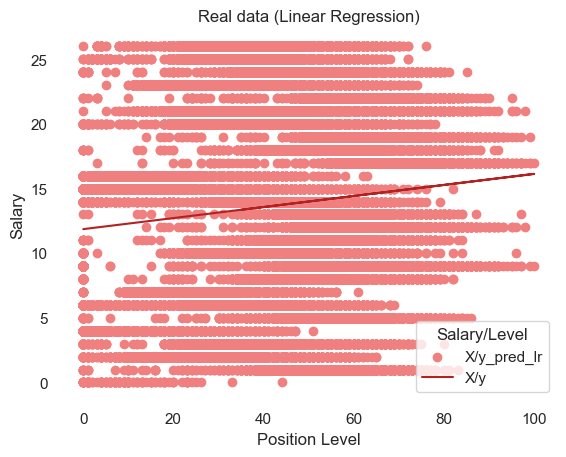

In [74]:
import matplotlib.pyplot as plt

# Reshape X to a 2D array
X_reshaped = X.reshape(-1, 1)

# Visualize real data with linear regression
plt.scatter(X, y, color='lightcoral')
plt.plot(X, lr.predict(X_reshaped), color='firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title='Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()


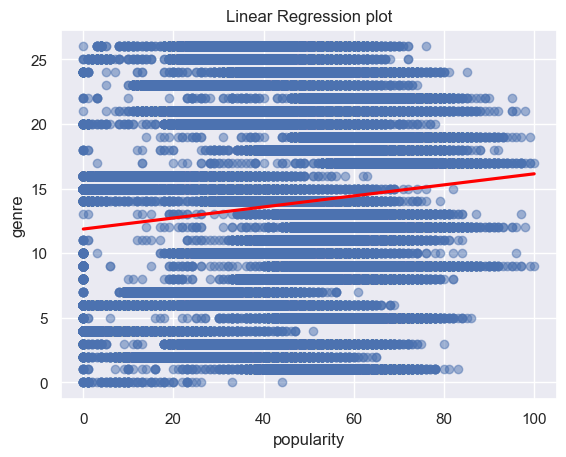

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a large dataset or use your own
# X and y should be your feature and target variables

# Create a scatter plot with alpha transparency
sns.regplot(x=X, y=y, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.title('Linear Regression plot')
plt.xlabel('popularity')
plt.ylabel('genre')
plt.show()


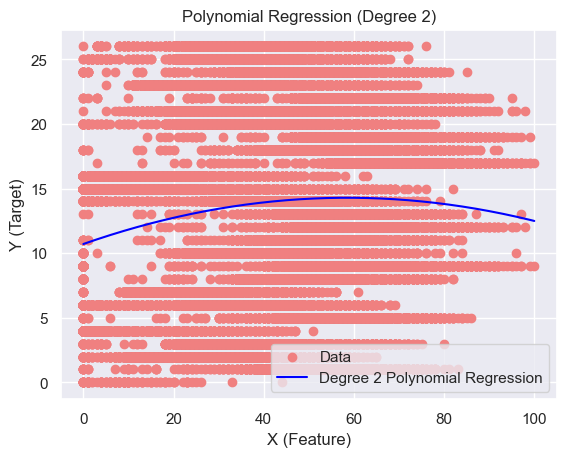

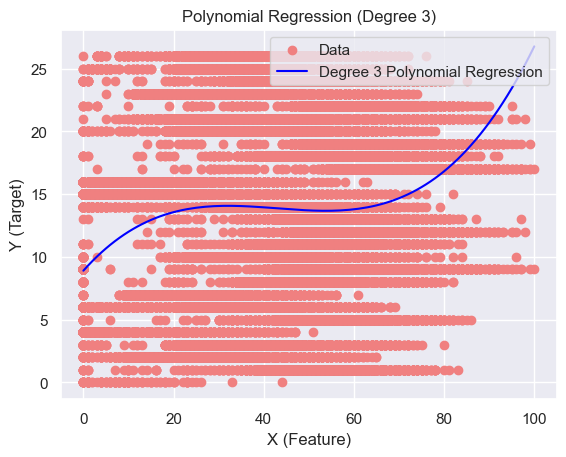

c:\Users\sukan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


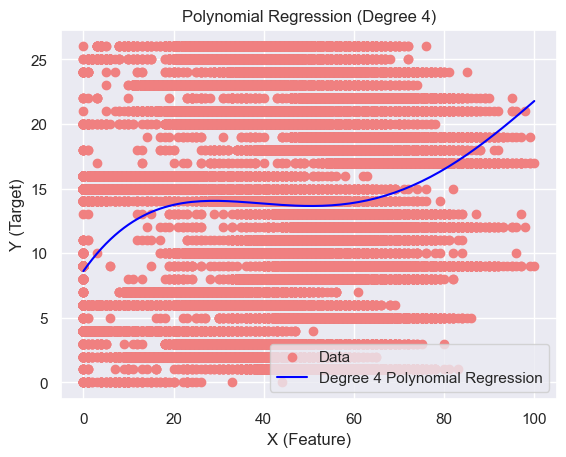

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have your data in X and y

# Reshape X to a 2D array
X_reshaped = X.reshape(-1, 1)

# Range of polynomial degrees to consider
degrees = [2, 3, 4]  # Add more degrees as needed

# Plot each degree separately
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_reshaped)

    # Fit a polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)

    # Sort X and y values for plotting
    X_sorted = np.sort(X_reshaped, axis=0)
    y_pred = poly_reg.predict(poly_features.transform(X_sorted))

    # Plot the data and polynomial regression line for the current degree
    plt.scatter(X_reshaped, y, color='lightcoral', label='Data')
    plt.plot(X_sorted, y_pred, color='blue', label=f'Degree {degree} Polynomial Regression')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('X (Feature)')
    plt.ylabel('Y (Target)')
    plt.legend()
    plt.show()


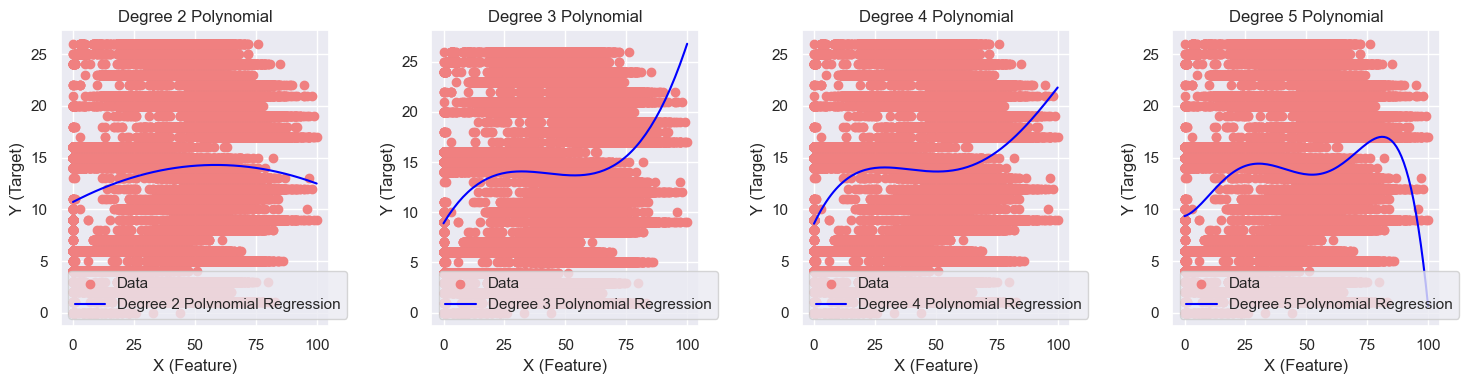

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have your data in X and y

# Reshape X to a 2D array
X_reshaped = X.reshape(-1, 1)

# Range of polynomial degrees to consider
degrees = [2, 3, 4, 5]  # Add more degrees as needed
num_plots = len(degrees)

# Create a grid of subplots for ravel plots
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_reshaped)

    # Fit a polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)

    # Sort X and y values for plotting
    X_sorted = np.sort(X_reshaped, axis=0)
    y_pred = poly_reg.predict(poly_features.transform(X_sorted))

    # Create ravel plot for the current degree
    ax = axes[i]
    ax.scatter(X_reshaped, y, color='lightcoral', label='Data')
    ax.plot(X_sorted, y_pred, color='blue', label=f'Degree {degree} Polynomial Regression')

    ax.set_title(f'Degree {degree} Polynomial')
    ax.set_xlabel('X (Feature)')
    ax.set_ylabel('Y (Target)')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [78]:
X = df_sal['popularity'].values
y = df_sal['genre'].values

In [79]:
print(len(X))
print(len(y))

232725
232725


In [80]:
X
min_X_value = np.min(X)
max_X_value = np.max(X)
print(min_X_value)
print(max_X_value)

0
100


In [81]:
y
min_y_value = np.min(y)
max_y_value = np.max(y)
print(min_y_value)
print(max_y_value)


0
26


In [82]:
print(len(X))

232725


In [83]:
print(len(y))

232725


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
          LinearRegression(**kwargs))


In [85]:
X_reshaped = X.reshape(-1,1)

In [86]:
print(len(X))
min_X_value = np.min(X)
max_X_value = np.max(X)
print(min_X_value)
print(max_X_value)


232725
0
100


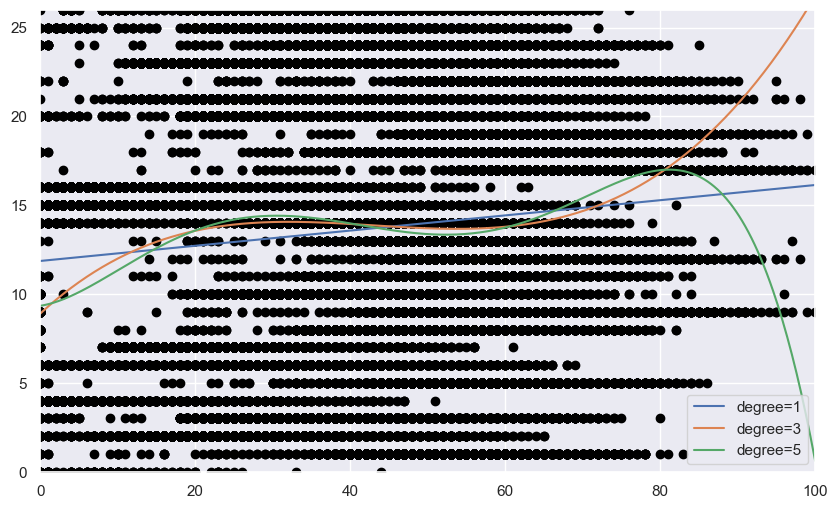

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # plot formatting

# Assuming you have your data in X_reshaped and y
X_test = np.linspace(X_reshaped.min(), X_reshaped.max(), 500)[:, None]
plt.figure(figsize=(10, 6))
plt.scatter(X_reshaped.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X_reshaped, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
# Set the x-axis limits based on the range of your data
plt.xlim(X_reshaped.min(), X_reshaped.max())  # Adjust based on your data range

# Set the y-axis limits based on the range of your expected y-values
plt.ylim(y.min(), y.max())  # Adjust based on your y-values range

plt.legend(loc='best')


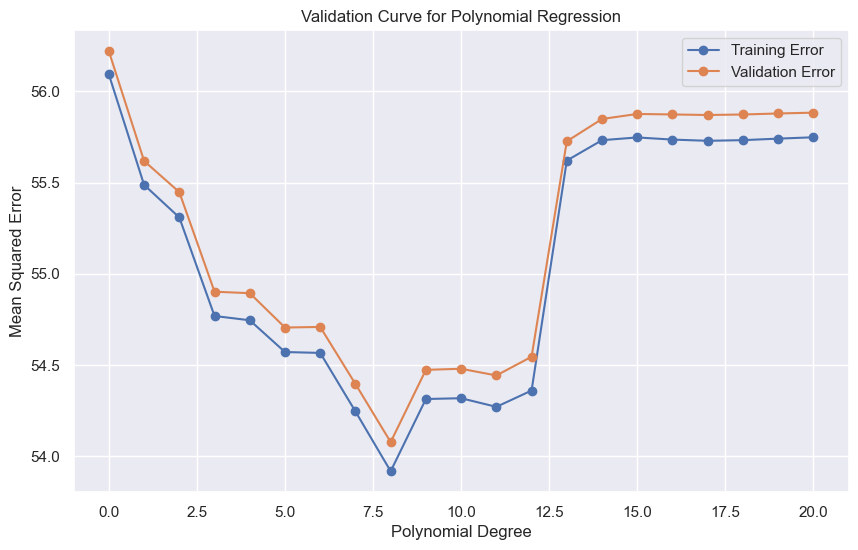

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y, test_size=0.2, random_state=0)
degrees = np.arange(0, 21)
train_errors, val_errors = [], []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)


    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calculate training and validation errors
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)

    train_errors.append(train_error)
    val_errors.append(val_error)
    # Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, val_errors, label='Validation Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

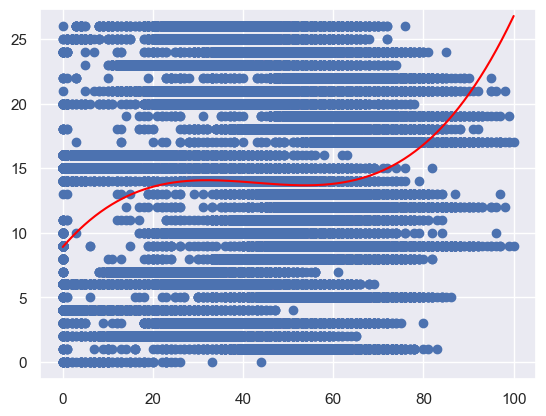

In [89]:
plt.scatter(X_reshaped.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X_reshaped, y).predict(X_test)
plt.plot(X_test.ravel(), y_test,color='red');
plt.axis(lim);


In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures_degree':np.arange(21),'linearregression_fit_intercept': [True,False],'linearregression_normalize':[True,False]}
grid =GridSearchCV(PolynomialRegression(),param_grid,cv=7)

In [109]:
grid.fit(X_reshaped,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [110]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 1}

(-5.0, 105.0, -1.3, 27.3)

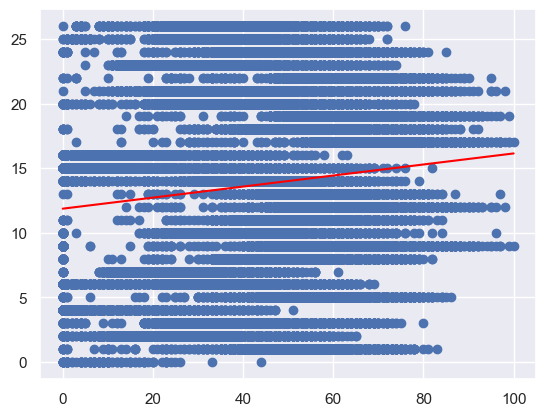

In [115]:
model = grid.best_estimator_
plt.scatter(X_reshaped.ravel(),y)
lim = plt.axis()
y_test = model.fit(X_reshaped,y).predict(X_test)
plt.plot(X_test.ravel(),y_test,color = 'red')
plt.axis(lim)